In [ ]:
#Name(s) here
#Sayuri Monarrez Yesaki sdm3465

# Association Analysis

Association analysis is one of the most used machine learning algorithms to extract hidden relationships from large datasets. In this assignment we'll be using one of the most commonly used algorithms for association rule mining - the Apriori algorithm.

The data belongs to a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 30/10/2016 to 09/04/2017.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products.

## Installation
`scikit-learn` does not provide any functionality for association rule mining so for this assignment you will be using the `MLxtend` library. The documentation for this library is available [here](http://rasbt.github.io/mlxtend/).

There are several ways of installing the `Mlxtend` library. The setup guide is available [here](http://rasbt.github.io/mlxtend/installation/).


### Conda

Most of you should use Conda to do the install. If you downladed Anaconda in order to get Jupyter Notebooks (which is the most common way to get Jupyter Notebooks), then you will want to install `MLxtend` using Conda. 

Open a command prompt / terminal window and type:

`conda install mlxtend --channel conda-forge`

### PyPi

You can also install via pip. Note: If you are running Jupyter notebooks through an Anaconda install, then pip may not place the `MLxtend` libraries in the correct place for use in Jupyter. 

Open a command prompt / terminal window and type:

`pip3 install mlxtend`


## Part 1 - Apriori Algorithm

The Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. In this part, you'll be running this algorithm for generating the itemsets that occur more than the `min_sup` threshold. Based on these frequent itemsets you'll find association rules that have confidence above the `min_conf` threshold.

In [76]:
# Standard imports (you can add additional headers if you wish)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [77]:
%matplotlib inline

In [78]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

In [79]:
dataset = load_dataset('BreadBasket_DMS.csv')
#dataset is a 2D list
print("Num transactions:", len(dataset))
#Print the first 10 transactions
dataset[:10]

Num transactions: 9531


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

**Q1.** Find the top 10 best-selling items in the bakery. Create a bar chart to display the total number of transactions for each of the top 10 selling items. Sort the bar chart by frequency (the top most sold item first, down to the 10th most sold item).

In [80]:
# create a dictionaty (items) where the key is an item in the bakery and value is the frequency that each item has been
#bought.
items = {}
for transaction in dataset:
    for item in transaction:
        if item in items:
            val = items[item]
            val += 1
            items[item] = val
        else:
            items[item] = 1
#Create a list of tuples and sort based on values.
import operator
sorted_items = sorted(items.items(), key=operator.itemgetter(1))
print(sorted_items)

[('Chicken sand', 1), ('The BART', 1), ('Adjustment', 1), ('Bacon', 1), ('Olum & polenta', 1), ('Polenta', 1), ('Gift voucher', 1), ('Raw bars', 1), ('Fairy Doors', 2), ('Bowl Nic Pitt', 2), ('Chimichurri Oil', 2), ('Spread', 2), ('Siblings', 2), ('Hack the stack', 2), ('Caramel bites', 3), ('Brioche and salami', 3), ('Raspberry shortbread sandwich', 3), ('Cherry me Dried fruit', 3), ('Bread Pudding', 4), ('Bare Popcorn', 5), ('Panatone', 5), ('Mortimer', 5), ('Basket', 6), ('Honey', 6), ('Lemon and coconut', 6), ('Crepes', 6), ('Pintxos', 6), ('Half slice Monster', 6), ('Victorian Sponge', 7), ('Empanadas', 7), ('Coffee granules', 7), ('Argentina Night', 7), ('Muesli', 8), ('Nomad bag', 8), ('Drinking chocolate spoons', 8), ('Gingerbread syrup', 9), ('Postcard', 10), ('Chocolates', 10), ('Mighty Protein', 11), ('Christmas common', 11), ('Tacos/Fajita', 11), ('Pick and Mix Bowls', 12), ('Kids biscuit', 12), ('Duck egg', 12), ('Dulce de Leche', 13), ("Valentine's card", 13), ('Crisps', 

In [81]:
#Get the top 10 best-selling items in the bakery  
best_items = []
for i in range(len(sorted_items) - 1, len(sorted_items) - 12, -1):
    best_items.append(sorted_items[i][0])
best_items.remove('NONE')
print('BEST ITEMS: ', best_items)
#Calculate the total number of transactions for each of the 10-best selling items.
item_transactions = []
for item in best_items:
    count = 0
    for transaction in dataset:
        if item in transaction:
            count += 1
    item_transactions.append(count)
print('TRANSACTIONS: ', item_transactions)

BEST ITEMS:  ['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna', 'Hot chocolate', 'Cookies', 'Brownie']
TRANSACTIONS:  [4528, 3097, 1350, 983, 815, 680, 585, 552, 515, 379]


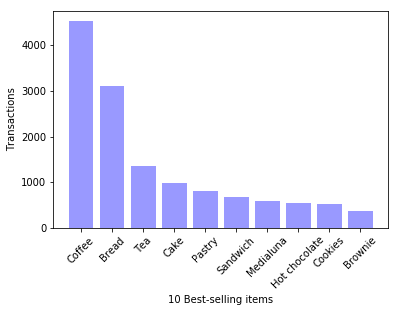

In [82]:
#Create bar chart to display frequencies of best-selling items.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 10
fig, ax = plt.subplots()
bar_width = 0.80
opacity = 0.4
index = np.arange(n_groups)
chart = ax.bar(index, item_transactions, bar_width, alpha=opacity, color='b',label='10 best selling transactions')
ax.set_xlabel('10 Best-selling items')
ax.set_ylabel('Transactions')
ax.set_xticks(index)
ax.set_xticklabels(best_items, rotation=45)
plt.show()


**Q2.** 

a.) Using `mlxtend.preprocessing.TransactionEncoder` transform `dataset` into an array format suitable for the `mlxtend` library. You will need to call `fit` then `transform`. 

`TransactionEncoder` learns unique items from the dataset and transforms each transaction into a one-hot encoded boolean numpy array. For example, the resulting encoded dataset will be represented by something like this, where each row is a transaction:
<img src="table.png">

b.) `TransactionEncoder` also has a function `inverse_transform` that allows you to tranform the one-hot encoded transaction back to the item labels. Try it out on the first 5 transactions and display the items in the first 5 transactions.

In [83]:
# Transform dataset into an array format suitable for mlxtend library.
#http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_transformed = te.fit(dataset).transform(dataset)

In [84]:
#Use inverse_transform to transform the one-hot encoded transaction back to the item labels
first5 = te_transformed[:5]
te.inverse_transform(first5)

[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry']]

**Q3.** Convert the encoded numpy array from Q2 part a into a pandas dataframe. Use the `TransactionEncoder`'s `.columns_` attribute as the column headers. Print the head of the resulting dataframe. 

In [85]:
#turn the array into pandas dataframe
import pandas as pd
dataframe = pd.DataFrame(te_transformed, columns=te.columns_)
dataframe.head(5)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Q4.** Use the `mlxtend.frequent_patterns.apriori` to generate the frequent itemsets with minimum support of 1%. Display these itemsets along with their support values.

In [216]:
# Generate the frequent itemsets with minumun support of 1% using apriori.
#https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
from mlxtend.frequent_patterns import apriori
freq_itemsets = apriori(dataframe, min_support=0.01,use_colnames=True)
# Calculate length of frequent itemsets
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))
freq_itemsets

,support,itemsets,length
0,0.036093,(Alfajores),1
1,0.015948,(Baguette),1
2,0.324940,(Bread),1
3,0.039765,(Brownie),1
4,0.103137,(Cake),1
5,0.012905,(Chicken Stew),1
6,0.475081,(Coffee),1
7,0.019305,(Coke),1
8,0.054034,(Cookies),1
9,0.038926,(Farm House),1


**Q5.** Using the frequent itemsets and support counts in Q4, find and display all the maximal frequent itemsets along with their support fraction.

In [217]:
def isSubset(itemset, max_freq_itemsets):
    #If max_freq_itemsets is empty, return false.
    if len(max_freq_itemsets) == 0:
        return False
    else:
        for i in range(len(itemset)):
            for j in range(len(max_freq_itemsets)):
                if len(max_freq_itemsets[j]) == 1:
                    if itemset[i] == max_freq_itemsets[j]:
                        break
                    else:
                        return False
                else:
                    for k in range(len(max_freq_itemsets[j])):
                        if itemset[i] == max_freq_itemsets[j][k]:
                            break
            if j == len(max_freq_itemsets):
                return False
        return True
            
def removesubsets(itemset, max_freq_itemsets):
    i = 0
    while i < len(max_freq_itemsets):
        count = 0
        for j in range(len(max_freq_itemsets[i])):
            for k in range(len(itemset)):
                if max_freq_itemsets[i][j] == itemset[k]:
                    count += 1
            if (count == len(max_freq_itemsets[i])):
                max_freq_itemsets.remove(max_freq_itemsets[i])
                i -= 1
        i += 1
    return max_freq_itemsets

# Display maximal frequent itemsets with their support fraction.
max_freq_itemsets = []
for index, row in freq_itemsets.iterrows():
    itemset = list((row['itemsets']))
    #check if the current itemset is a subset of something.
    if not(isSubset(itemset, max_freq_itemsets)):
        #if itemset not a subset, add it to the list  and do a superset check.
        max_freq_itemsets = removesubsets(itemset, max_freq_itemsets)
        max_freq_itemsets.append(itemset)
print(len(max_freq_itemsets))

42


In [218]:
#Display max frequent itemsets with their support fraction
print('itemset', 'support fraction')
for item in max_freq_itemsets:
    for index, row in freq_itemsets.iterrows():
        itemset = list((row['itemsets']))
        if item == itemset:
            sup = row['support']
            print(item, sup)

itemset support fraction
['Baguette'] 0.015947959290735496
['Chicken Stew'] 0.012905256531318854
['Coke'] 0.019305424404574546
['Farm House'] 0.0389256111635715
['Fudge'] 0.014898751442660792
['Hearty & Seasonal'] 0.010492078480747036
['Jam'] 0.014898751442660792
['Jammie Dodgers'] 0.013115098100933795
['Mineral water'] 0.014059385164201028
['Salad'] 0.010387157695939566
['Scandinavian'] 0.02885321582205435
['Tiffin'] 0.015318434581890673
['Truffles'] 0.02014479068303431
['Bread', 'Alfajores'] 0.010282236911132095
['Coffee', 'Alfajores'] 0.019515265974189486
['Bread', 'Brownie'] 0.010701920050361977
['Bread', 'Cake'] 0.02318749344245095
['Bread', 'Cookies'] 0.01437414751862344
['Bread', 'Hot chocolate'] 0.013324939670548736
['Bread', 'Medialuna'] 0.01678732556919526
['Bread', 'NONE'] 0.02056447382226419
['Bread', 'Sandwich'] 0.01689224635400273
['Bread', 'Tea'] 0.027908928758787116
['Coffee', 'Brownie'] 0.019515265974189486
['Coffee', 'Cake'] 0.054348966530269646
['Hot chocolate', 'Cak

**Q6.** Using the frequent itemsets and support counts in Q4, find all the closed frequent itemsets along with their support fraction.

In [226]:
def getSupportValue(item):
    sup = 0
    for index, row in freq_itemsets.iterrows():
        itemset = list((row['itemsets']))
        if item == itemset:
            sup = row['support']
    return sup

def isSubset_closed(itemset, closed_freq_itemsets):
    itemsetSupportValue = getSupportValue(itemset)
    highestSuperSetSupportValue = -1
    #If closed_freq_itemsets is empty, return false.
    if len(closed_freq_itemsets) == 0:
        return False
    else:
        for j in range(len(closed_freq_itemsets)):
            count = 0
            for i in range(len(itemset)):
                for k in range(len(closed_freq_itemsets[j])):
                    if itemset[i] == closed_freq_itemsets[j][k]:
                        count += 1
            if count == len(itemset):
                highestSuperSetSupportValue = max(highestSuperSetSupportValue, getSupportValue(closed_freq_itemsets[j]))
    if highestSuperSetSupportValue != -1 and itemsetSupportValue > highestSuperSetSupportValue:
        return True
    return False
            
def removesubsets_closed(itemset, closed_freq_itemsets):
    i = 0
    while i < len(closed_freq_itemsets):
        count = 0
        for j in range(len(closed_freq_itemsets[i])):
            for k in range(len(itemset)):
                if closed_freq_itemsets[i][j] == itemset[k]:
                    count += 1
            if (count == len(closed_freq_itemsets[i])):
                if getSupportValue(closed_freq_itemsets[i]) < getSupportValue(itemset[k]):
                    closed_freq_itemsets.remove(closed_freq_itemsets[i])
                    i -= 1
        i += 1
    return closed_freq_itemsets

# Display maximal frequent itemsets with their support fraction.
closed_freq_itemsets = []
for index, row in freq_itemsets.iterrows():
    itemset = list((row['itemsets']))
    #check if the current itemset is a subset of something.
    if not(isSubset_closed(itemset, closed_freq_itemsets)):
        #if itemset not a subset, add it to the list  and do a superset check.
        closed_freq_itemsets = removesubsets_closed(itemset, closed_freq_itemsets)
        closed_freq_itemsets.append(itemset)
print(len(closed_freq_itemsets))

63


In [227]:
#Display max frequent itemsets with their support fraction
print('itemset', 'support fraction')
for item in closed_freq_itemsets:
    for index, row in freq_itemsets.iterrows():
        itemset = list((row['itemsets']))
        if item == itemset:
            sup = row['support']
            print(item, sup)

itemset support fraction
['Alfajores'] 0.0360927499737698
['Baguette'] 0.015947959290735496
['Bread'] 0.3249396705487357
['Brownie'] 0.039764977442031266
['Cake'] 0.10313713146574337
['Chicken Stew'] 0.012905256531318854
['Coffee'] 0.4750813136082258
['Coke'] 0.019305424404574546
['Cookies'] 0.054034204175847235
['Farm House'] 0.0389256111635715
['Fudge'] 0.014898751442660792
['Hearty & Seasonal'] 0.010492078480747036
['Hot chocolate'] 0.05791627321372364
['Jam'] 0.014898751442660792
['Jammie Dodgers'] 0.013115098100933795
['Juice'] 0.03829608645472668
['Medialuna'] 0.061378659112370164
['Mineral water'] 0.014059385164201028
['Muffin'] 0.03819116566991921
['NONE'] 0.07900535096002519
['Pastry'] 0.08551043961808834
['Salad'] 0.010387157695939566
['Sandwich'] 0.07134613366907984
['Scandinavian'] 0.02885321582205435
['Scone'] 0.034309096632042804
['Soup'] 0.03420417584723534
['Spanish Brunch'] 0.0180463749868849
['Tea'] 0.141643059490085
['Tiffin'] 0.015318434581890673
['Toast'] 0.0333648

**Q7.** Use `mlxtend.frequent_patterns.association_rules` to calculate rules with a confidence level of 0.25 for the frequent itemsets you generated in Q4.

In [228]:
# Calculate rules with a confidence level of 0.25 for freq_itemsets
#http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.036093,0.324940,0.010282,0.284884,0.876728,-0.001446,0.943987
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
2,(Brownie),(Bread),0.039765,0.324940,0.010702,0.269129,0.828244,-0.002219,0.923639
3,(Bread),(Coffee),0.324940,0.475081,0.089393,0.275105,0.579069,-0.064980,0.724131
4,(Cookies),(Bread),0.054034,0.324940,0.014374,0.266019,0.818673,-0.003184,0.919725
5,(Medialuna),(Bread),0.061379,0.324940,0.016787,0.273504,0.841708,-0.003157,0.929201
6,(NONE),(Bread),0.079005,0.324940,0.020564,0.260292,0.801048,-0.005107,0.912604
7,(Pastry),(Bread),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
8,(Brownie),(Coffee),0.039765,0.475081,0.019515,0.490765,1.033013,0.000624,1.030799
9,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667


**Q8.** An important step in generating a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low we will get a lot of rules and most of them will not be useful. Generate the frequent itemsets with minimum support of 0.5% and plot the number of rules generated with respect to the confidence threshold by varying its value between 0 and 1 with increments of 0.1. What happens when we increase the confidence level? Why?

In [233]:
#Generate frequent itemsets with minimum support of 0.5%.
freq_itemsets2 = apriori(dataframe, min_support=0.005,use_colnames=True)
#Calculate the number of rules generated with respect to the confidence treshold by varying its
#value between 0 and 1 with increments of 0.1.
num_rules = []
confidence = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for conf in confidence:
    r = association_rules(freq_itemsets2, metric='confidence', min_threshold=conf)
    r_length = len(r)
    num_rules.append(r_length)
num_rules

[226, 120, 63, 39, 27, 19, 4, 2, 1, 0, 0]

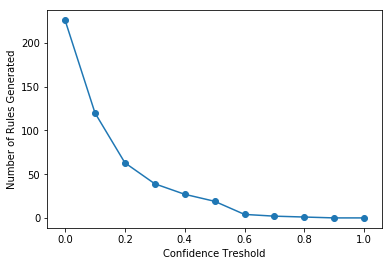

In [234]:
#Plot the number of rules generated
import matplotlib.pyplot as plt
plt.scatter(confidence, num_rules)
plt.plot(confidence, num_rules)
plt.ylabel('Number of Rules Generated')
plt.xlabel('Confidence Treshold')
plt.show()

In [ ]:
'''When we increase the confidence level, the number of rules generated decreases until 
there are zero rules generated. Confidence determines how frequently Y item is bought together when a transaction 
contains X. Meaning that the higher the confidence, the more likely it is that those items are bought in the same 
transaction. Therefore, only a few rules have a high confidence that Y and X items would be in the same transaction.'''

**Q9.** What value would you choose for the minimum confidence threshold based on the plot in Q8? Why? Display the rules generated for your chosen value. Take a look at the generated rules. Are they interesting? Why/why not?

In [10]:
'''Based on plot from Q8, I would choose a minimum confidence treshold of 0.6 because only four rules were generated 
with this confidence treshold value. By only having four rules it is easier for the marketing team of The Bread Basket
bakery to follow these rules and try to increase their sales by offering promotions or good deals.'''

In [237]:
#Display the rules generated for confidence value of 0.6
rules2 = association_rules(freq_itemsets2, metric="confidence", min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Keeping It Local),(Coffee),0.006610,0.475081,0.005351,0.809524,1.703969,0.002211,2.755823
1,(Salad),(Coffee),0.010387,0.475081,0.006505,0.626263,1.318222,0.001570,1.404512
2,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
3,"(Hot chocolate, Cake)",(Coffee),0.011331,0.475081,0.006820,0.601852,1.266840,0.001436,1.318400


In [ ]:
'''The first two transactions are sort of interesting as I did not expect that salad and coffee would be bought 
together. I am not really sure what keeping it local is, but the confidence value of keeping it local bought 
when coffee was bought is interesting. The other rules are less interesting as people tend to eat bread when drinking
coffee as well as hot chocolate and cake with coffee. '''